In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [2]:
df = pd.read_csv('results/simulated_data_results.csv')
df.head()

,model,assignment,alpha,threshold,nmi,iteration
0,BiAA,soft,0.0,0.90,1.0,0
1,BiAA,soft,0.0,0.75,1.0,0
2,BiAA,soft,0.0,0.50,1.0,0
3,BiAA,soft,0.0,0.00,1.0,0
4,BiAA,hard,0.0,0.90,1.0,0


In [3]:
import numpy as np
import matplotlib as mpl

def create_palette(saturation, value, n_colors, int_colors=3):
        hue = np.linspace(0, 1, n_colors, endpoint=False)
        hue = np.hstack([hue[i::int_colors] for i in range(int_colors)])
        saturation = np.full(n_colors, saturation)
        value = np.full(n_colors, value)
        # convert to RGB
        c = mpl.colors.hsv_to_rgb(np.vstack([hue, saturation, value]).T)
        # Create palette
        palette = mpl.colors.ListedColormap(c)
        return palette

palette = sns.color_palette(create_palette(0.5, 0.95, 4, 1)(np.arange(4)))
palette

[(0.95, 0.475, 0.475),
 (0.7124999999999999, 0.95, 0.475),
 (0.475, 0.95, 0.95),
 (0.7124999999999999, 0.475, 0.95)]

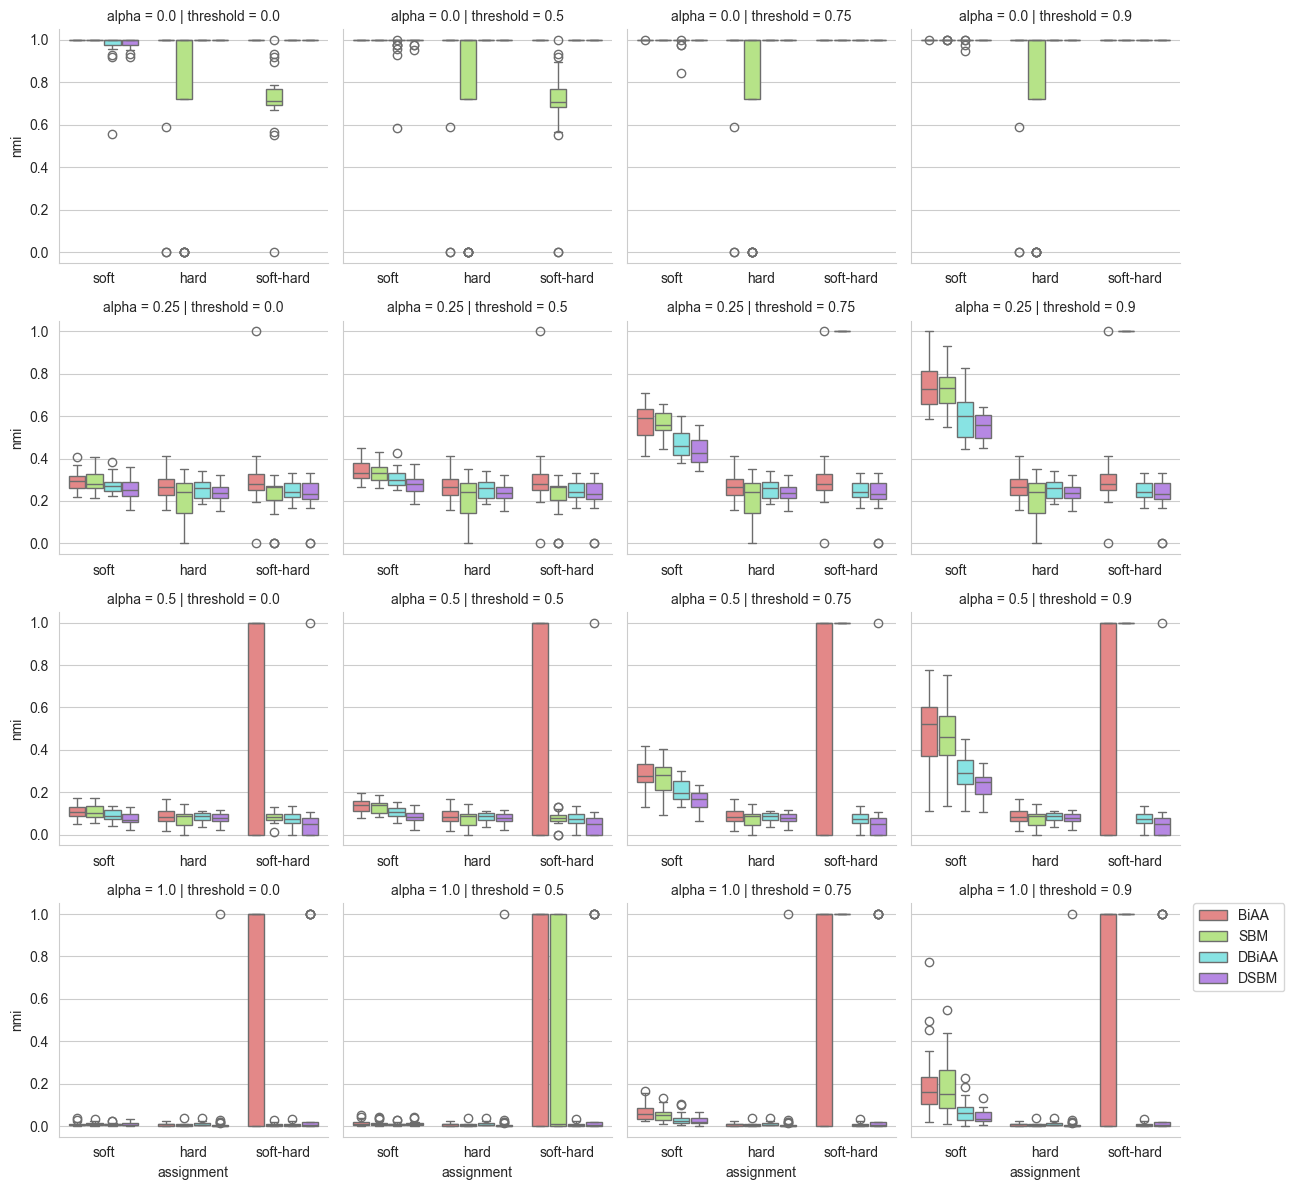

In [4]:
import matplotlib.pyplot as plt

sns.FacetGrid(df, col='threshold', row='alpha', palette="viridis", sharex=False).map_dataframe(sns.boxplot,
                                                                                               x='assignment', 
                                                                                               y='nmi',
                                                                                               hue='model', 
                                                                                               palette=palette, 
                                                                                               fill=True,
                                                                                               gap=0.1)

# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [5]:
df = pd.read_csv('results/simulated_data_results_loss.csv')

# select only iteration % 10 == 0

df = df[df['iteration'] % 10 == 0]
df.head()

,loss,model,assignment,alpha,iteration
0,10331.412109,BiAA,soft,0.0,0
10,10319.829102,BiAA,soft,0.0,10
20,10295.203125,BiAA,soft,0.0,20
30,10239.126953,BiAA,soft,0.0,30
40,10143.662109,BiAA,soft,0.0,40


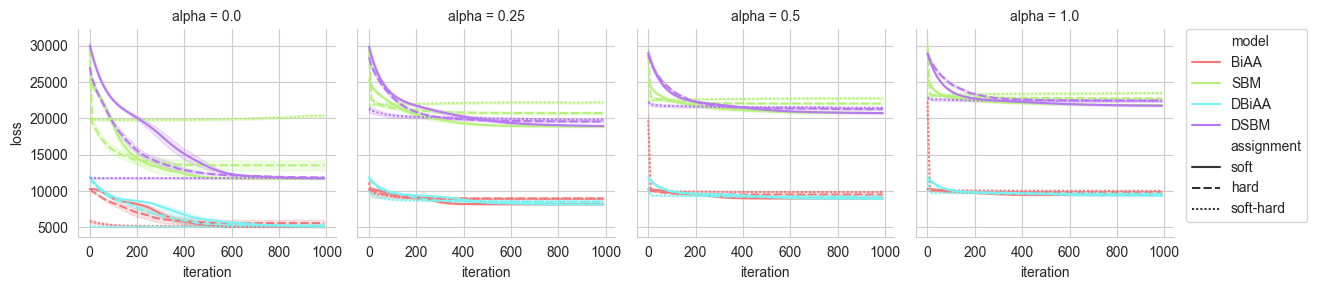

In [7]:
sns.FacetGrid(df, col='alpha', palette="viridis", sharex=False)\
    .map_dataframe(
    sns.lineplot,
    x='iteration',
    y='loss',
    hue='model',
    style='assignment',
    palette=palette
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()